## Tim Sort Algorithm

Tim sort is an efficient, hybrid sorting algorithm derived from merge sort and insertion sort. It is designed to perform well on many kinds of real-world data. Tim sort is the standard sorting algorithm in languages like Python and Java.

### How Tim Sort Works

    Initial Setup:
        Divide the list into small chunks called "runs".

    Sort Small Runs:
        Use insertion sort to sort each run individually.

    Merge Runs:
        Use a merge sort to merge the runs together.

    Minimize Comparisons:
        Optimize merging by using techniques like galloping to minimize comparisons.

    Repeat:
        Repeat the merge process until the entire list is sorted.

### Visualization

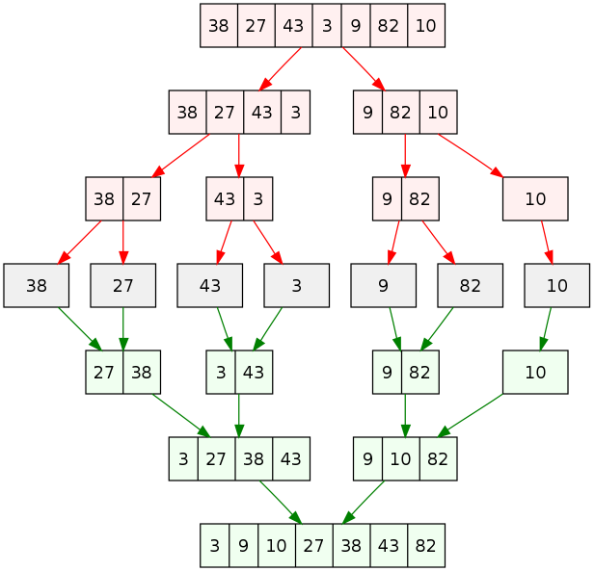

### Time Complexity

**O(n log n)** (worst-case)

Tim sort is efficient and stable, making it suitable for large datasets. It takes advantage of existing order in the data to minimize comparisons and improve performance, making it particularly effective for sorting real-world data.

### MIN_RUN Explanation

- `MIN_RUN` is a constant that determines the minimum length of runs (subarrays) in Tim sort. 
- Runs are small, sorted subarrays used as a foundational unit in Tim sort's sorting strategy.
- Choosing an appropriate `MIN_RUN` value balances between insertion sort's efficiency on small arrays and merge sort's efficiency on larger ones.

In [1]:
## Tim Sort Implementation in Python

MIN_RUN = 32

def insertion_sort(arr, left, right):
    for i in range(left + 1, right + 1):
        key = arr[i]
        j = i - 1
        while j >= left and arr[j] > key:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key

def merge(arr, start, mid, end):
    len1, len2 = mid - start + 1, end - mid
    left, right = [], []
    for i in range(0, len1):
        left.append(arr[start + i])
    for i in range(0, len2):
        right.append(arr[mid + 1 + i])
    
    i, j, k = 0, 0, start
    while i < len1 and j < len2:
        if left[i] <= right[j]:
            arr[k] = left[i]
            i += 1
        else:
            arr[k] = right[j]
            j += 1
        k += 1
    
    while i < len1:
        arr[k] = left[i]
        k += 1
        i += 1

    while j < len2:
        arr[k] = right[j]
        k += 1
        j += 1

def tim_sort(arr):
    n = len(arr)
    for i in range(0, n, MIN_RUN):
        insertion_sort(arr, i, min((i + MIN_RUN - 1), (n - 1)))
    
    size = MIN_RUN
    while size < n:
        for start in range(0, n, size * 2):
            mid = min((start + size - 1), (n - 1))
            end = min((start + size * 2 - 1), (n - 1))
            if mid < end:
                merge(arr, start, mid, end)
        size *= 2 
    
    return arr

# Example usage:
my_list = [64, 34, 25, 12, 22, 11, 90, 7, 35, 18, 42, 55]
sorted_list = tim_sort(my_list)
print("Sorted array:", sorted_list)


Sorted array: [7, 11, 12, 18, 22, 25, 34, 35, 42, 55, 64, 90]


**Timsort** is actually built right into Python, so this code only serves as an explainer. To use Timsort simply write:

In [8]:
my_list = [64, 34, 25, 12, 22, 11, 90, 7, 35, 18, 42, 55]
my_list.sort()
print(my_list)

[7, 11, 12, 18, 22, 25, 34, 35, 42, 55, 64, 90]
